In [1]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../dataset/AirPassengers.csv')
df = df.rename(columns={'#Passengers' : 'y', 'Month' : 'ds'})
df.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df['y_orig'] = df['y']
df.head()

,ds,y,y_orig
0,1949-01,112,112
1,1949-02,118,118
2,1949-03,132,132
3,1949-04,129,129
4,1949-05,121,121


In [20]:
df['y'] = np.log(df['y'])
df.head()

,ds,y,y_orig,y_log
0,1949-01,4.718499,112,112
1,1949-02,4.770685,118,118
2,1949-03,4.882802,132,132
3,1949-04,4.859812,129,129
4,1949-05,4.795791,121,121


In [6]:
model = Prophet()
model.fit(df)

10:43:29 - cmdstanpy - INFO - Chain [1] start processing
10:43:31 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future_data = model.make_future_dataframe(periods=12, freq='M')

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [8]:
forecast_data = model.predict(future_data)
forecast_data.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,4.802627,4.666648,4.757968,4.802627,4.802627,-0.088786,-0.088786,-0.088786,-0.088786,-0.088786,-0.088786,0.0,0.0,0.0,4.713841
1,1949-02-01,4.808194,4.663264,4.750296,4.808194,4.808194,-0.100080,-0.100080,-0.100080,-0.100080,-0.100080,-0.100080,0.0,0.0,0.0,4.708114
2,1949-03-01,4.813221,4.790426,4.882857,4.813221,4.813221,0.021981,0.021981,0.021981,0.021981,0.021981,0.021981,0.0,0.0,0.0,4.835203
3,1949-04-01,4.818788,4.766548,4.861146,4.818788,4.818788,-0.002275,-0.002275,-0.002275,-0.002275,-0.002275,-0.002275,0.0,0.0,0.0,4.816513
4,1949-05-01,4.824175,4.771511,4.859749,4.824175,4.824175,-0.008738,-0.008738,-0.008738,-0.008738,-0.008738,-0.008738,0.0,0.0,0.0,4.815437


In [9]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,4.713841,4.666648,4.757968
1,1949-02-01,4.708114,4.663264,4.750296
2,1949-03-01,4.835203,4.790426,4.882857
3,1949-04-01,4.816513,4.766548,4.861146
4,1949-05-01,4.815437,4.771511,4.859749


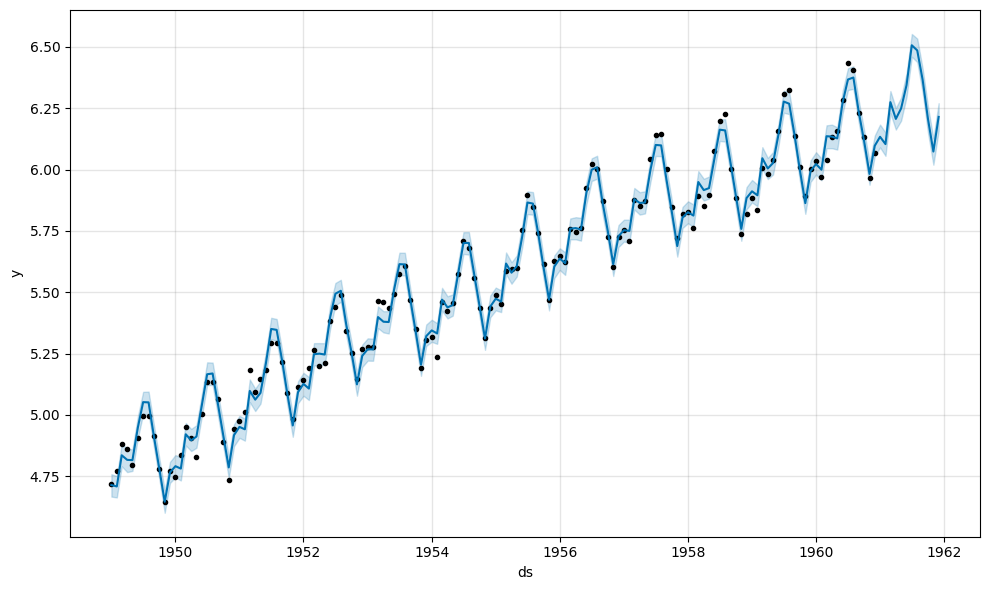

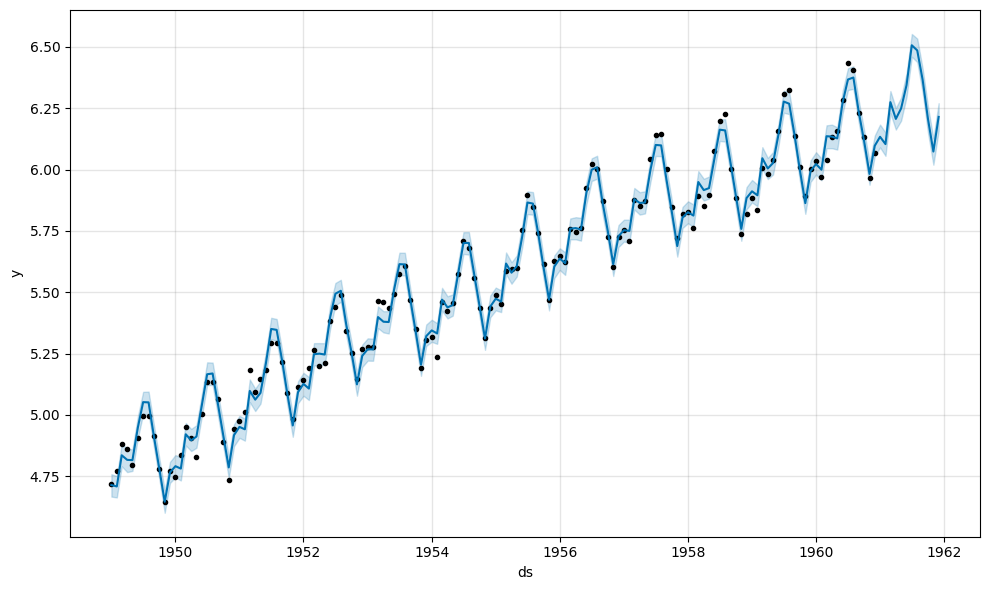

In [13]:
model.plot(forecast_data)

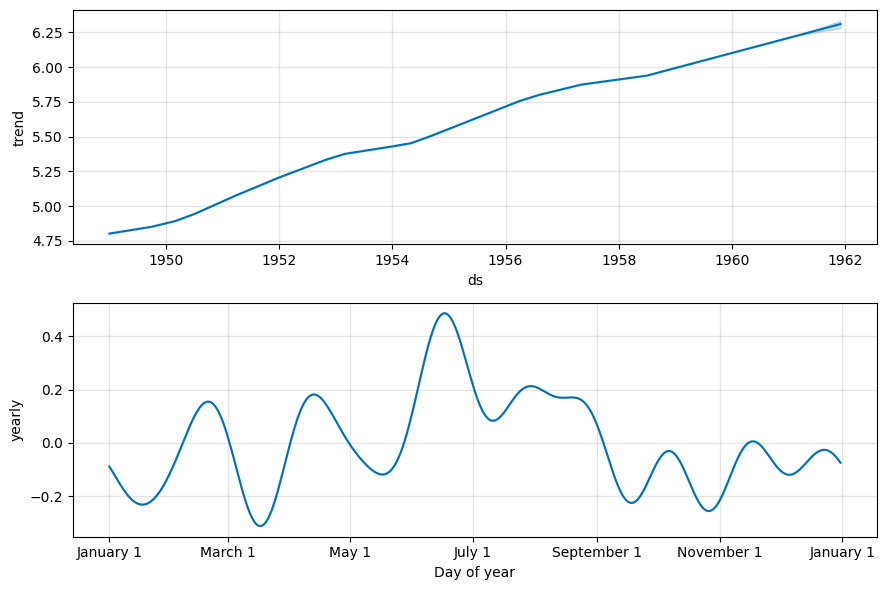

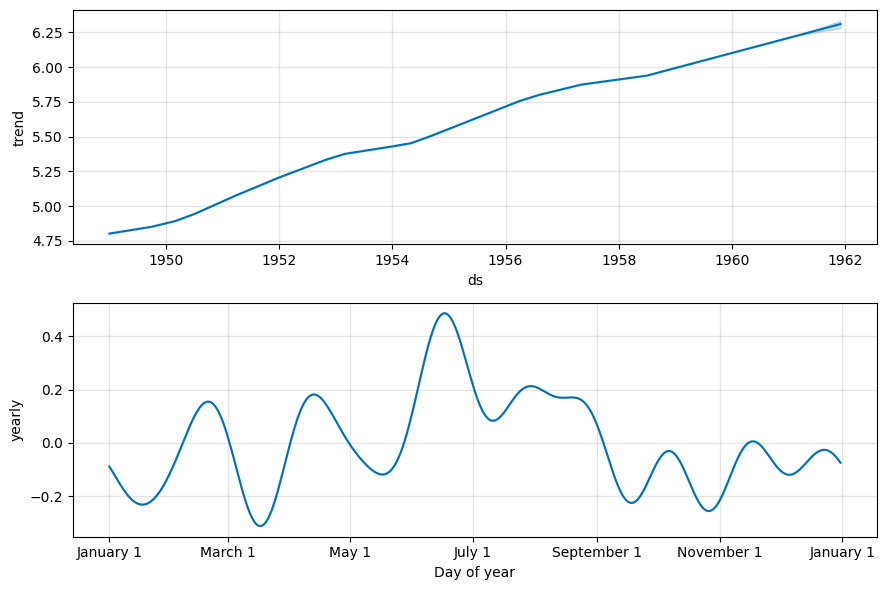

In [14]:
model.plot_components(forecast_data)

In [15]:
forecast_data_orig = forecast_data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

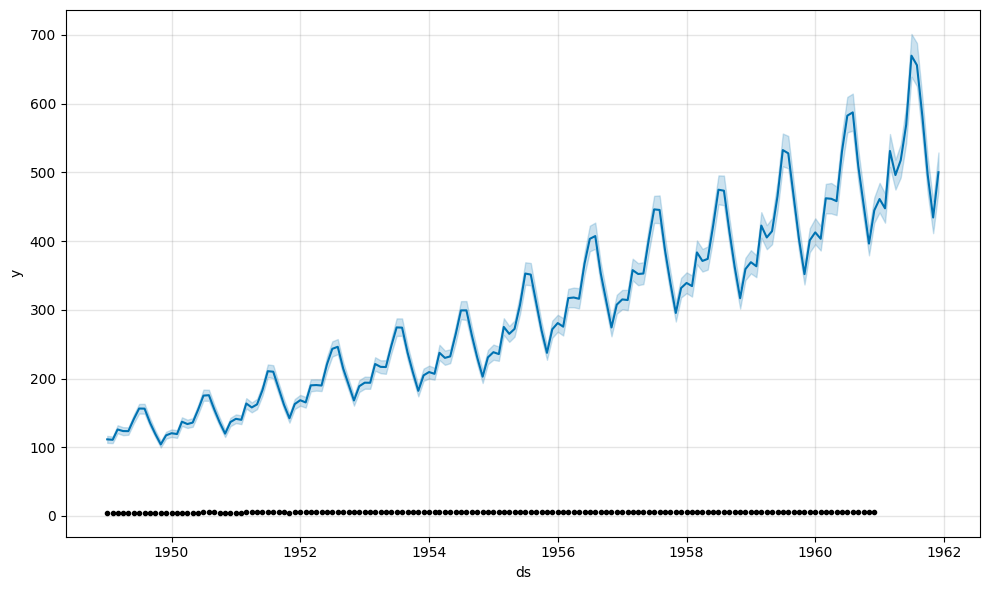

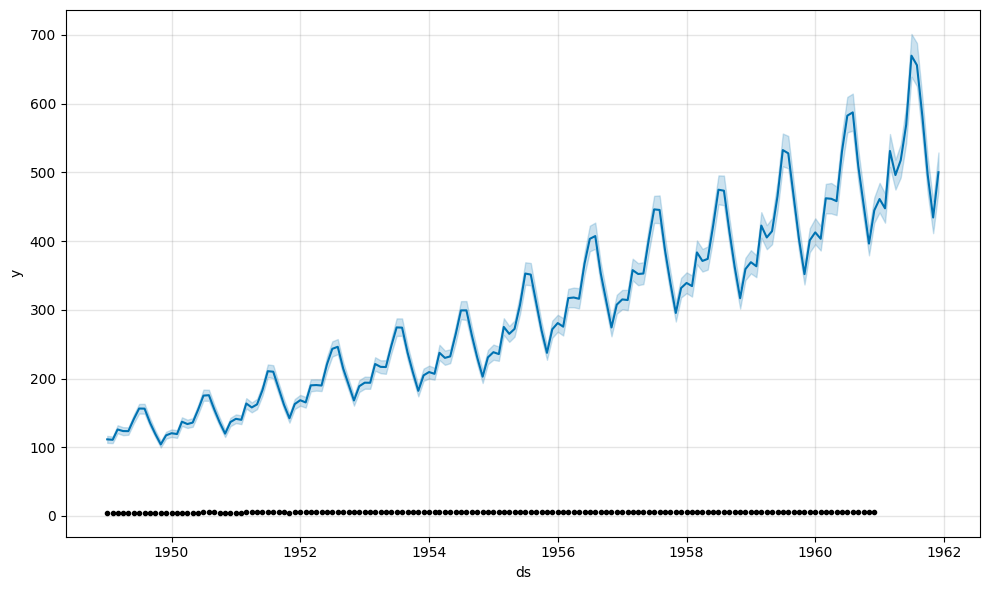

In [16]:
model.plot(forecast_data_orig)

In [21]:
df['y_log'] = df['y']
df['y'] = df['y_orig']
df.head()

,ds,y,y_orig,y_log
0,1949-01,112,112,4.718499
1,1949-02,118,118,4.770685
2,1949-03,132,132,4.882802
3,1949-04,129,129,4.859812
4,1949-05,121,121,4.795791


In [18]:
final_df = pd.DataFrame(forecast_data_orig)
final_df.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,4.802627,106.340702,116.508893,4.802627,4.802627,-0.088786,-0.088786,-0.088786,-0.088786,-0.088786,-0.088786,0.0,0.0,0.0,111.479557
1,1949-02-01,4.808194,105.981409,115.618473,4.808194,4.808194,-0.100080,-0.100080,-0.100080,-0.100080,-0.100080,-0.100080,0.0,0.0,0.0,110.842922
2,1949-03-01,4.813221,120.352605,132.007234,4.813221,4.813221,0.021981,0.021981,0.021981,0.021981,0.021981,0.021981,0.0,0.0,0.0,125.864074
3,1949-04-01,4.818788,117.512908,129.172135,4.818788,4.818788,-0.002275,-0.002275,-0.002275,-0.002275,-0.002275,-0.002275,0.0,0.0,0.0,123.533617
4,1949-05-01,4.824175,118.097570,128.991861,4.824175,4.824175,-0.008738,-0.008738,-0.008738,-0.008738,-0.008738,-0.008738,0.0,0.0,0.0,123.400707
